## Loading Libraries

In [1]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

## Gathering Live Data
<ul>
    <li>Collecting live data from USGS.gov (United States Geological Survey)</li>
    <li>Using Aws services like Amazon EventBridge, Lambda  to collect live-data periodically at midnight.(cron-job)</li>
    <li>Using S3 to store data in json format and converting it into .csv file.</li>
</ul>

In [2]:
# Downloading data from aws3 
import boto3
s3= boto3.client('s3')
bucket_name='eq-data-csv-to-json-cron-job'
fileName = 'eq_data_csv_to_json_format.json'
fName='C:/Users/ratup/Desktop/ASP/DataSets/USGSgov/eq_json_format_data.json'
s3.download_file(Bucket=bucket_name,Key=fileName,Filename=fName)

df=pd.read_json(fName)
s=df.to_csv('all_month.csv',index=None)

In [3]:
df=pd.read_csv('all_month.csv')

## Features in the dataset
<ul>
    <li>time ---- Time when the event occurred. Times are reported in milliseconds since the epoch. </li> 
    <li>latitude ---- Decimals degrees latitude. Negative values for southern latitudes. </li>
    <li>longitutde ----Decimals degrees longitude. Negative values for western longitudes. </li>
    <li>depth ---- Depth of the event in kilometers.</li>
    <li>mag ---- Magnitude of event occurred.</li>
    <li>magType ---- The method or algorithm used to calculate the preferreds magnitude.</li>
    <li>nst ---- The total number ofseismic stations used to determine earthquake locations. </li>
    <li>gap ---- The largest azimuthal gap between azimuthally adjacent stations (in degrees).</li>
    <li>dmin ---- Horizontal distance from the epicenter to the nearest station (in degrees).</li>
    <li>rms ---- The root-mean-square (RMS) travel time residual, in sec, using all weights.</li>
    <li>net ---- The ID of data source contributor for event occured.</li>
    <li>id ---- A unique identifier for the event.</li>
    <li>types ---- A comma-seperated list of product types associated to this event.</li>
    <li>place ---- named geographic region near to the event.</li>
    <li>type ---- Type of seismic event.</li>
    <li>locationSource ---- The network that originally authored the reported the location of this event.</li>
    <li>magSource ---- Network that orginally authored the reported magnitude for this event.</li>
    <li>horizontalError ---- Uncertainty of reported location of the event in kilometers.</li>
    <li>depthError---- The depth erroe, three princcipal errora on a vertical line.</li>
    <li>magError ---- Uncertainty of reported magnitude of the event.</li>
    <li>magNst ---- The total number of seismic stations to calculate the magnitude of earthquake.</li>
    <li>status ---- Indicates whether the event has been reviewed by a human.</li>
</ul>

In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-30T16:47:14.340Z,34.917667,-119.364667,2.48,1.33,ml,16.0,93.0,0.04567,0.24,...,2022-11-30T16:50:48.971Z,"16km SSE of Maricopa, CA",earthquake,0.52,1.25,0.300,19.0,automatic,ci,ci
1,2022-11-30T16:39:39.830Z,34.386833,-118.384833,11.84,1.28,ml,30.0,48.0,0.08044,0.27,...,2022-11-30T16:43:10.031Z,"10km NNE of Sylmar, CA",earthquake,0.41,1.58,0.244,28.0,automatic,ci,ci
2,2022-11-30T16:32:59.550Z,60.989300,-151.298300,58.20,1.20,ml,NaN,NaN,NaN,0.17,...,2022-11-30T16:34:13.744Z,"Kenai Peninsula, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2022-11-30T16:03:14.977Z,63.962900,-149.859900,10.90,1.40,ml,NaN,NaN,NaN,0.86,...,2022-11-30T16:05:58.776Z,"36 km W of Ferry, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
4,2022-11-30T16:01:07.400Z,38.754501,-122.425835,6.40,2.06,md,18.0,67.0,NaN,0.09,...,2022-11-30T16:56:10.308Z,"13km ESE of Hidden Valley Lake, CA",earthquake,0.26,1.04,0.070,13.0,automatic,nc,nc


In [5]:
df.shape

(10159, 22)

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10159.000000,10159.000000,10159.000000,10157.000000,7797.000000,7797.000000,5960.000000,10159.000000,6829.000000,10159.000000,7457.000000,7791.000000
mean,39.055773,-116.229115,23.402517,1.697825,24.415929,113.588367,0.675065,0.283931,1.734158,1.967498,0.293069,15.414581
std,20.221343,67.548727,58.941876,1.235994,23.803864,60.466778,2.321859,0.259221,3.121193,4.545885,0.560159,30.346685
min,-64.241300,-179.978100,-3.740000,-1.600000,3.000000,13.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.183750,-152.958550,3.150000,0.900000,9.000000,68.000000,0.021572,0.100000,0.270000,0.418407,0.106762,4.000000
50%,38.814835,-122.797833,7.850000,1.490000,18.000000,99.000000,0.059935,0.180000,0.450000,0.730000,0.167000,8.000000
75%,57.053100,-116.204267,16.000000,2.140000,32.000000,147.000000,0.194550,0.440000,0.860000,1.500000,0.244000,16.000000
max,85.808800,179.983000,660.000000,7.300000,492.000000,352.540000,39.051000,2.390000,23.550000,99.100000,5.560000,714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159 entries, 0 to 10158
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10159 non-null  object 
 1   latitude         10159 non-null  float64
 2   longitude        10159 non-null  float64
 3   depth            10159 non-null  float64
 4   mag              10157 non-null  float64
 5   magType          10157 non-null  object 
 6   nst              7797 non-null   float64
 7   gap              7797 non-null   float64
 8   dmin             5960 non-null   float64
 9   rms              10159 non-null  float64
 10  net              10159 non-null  object 
 11  id               10159 non-null  object 
 12  updated          10159 non-null  object 
 13  place            10159 non-null  object 
 14  type             10159 non-null  object 
 15  horizontalError  6829 non-null   float64
 16  depthError       10159 non-null  float64
 17  magError    

**Finding out the features which are list important and having many null values.So, that we can select best features for feature engineering and data wrangling.**

In [8]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   2
magType               2
nst                2362
gap                2362
dmin               4199
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3330
depthError            0
magError           2702
magNst             2368
status                0
locationSource        0
magSource             0
dtype: int64

**Visualize latitude and longitude features from dataframe to see where the points fall from the feature set.**

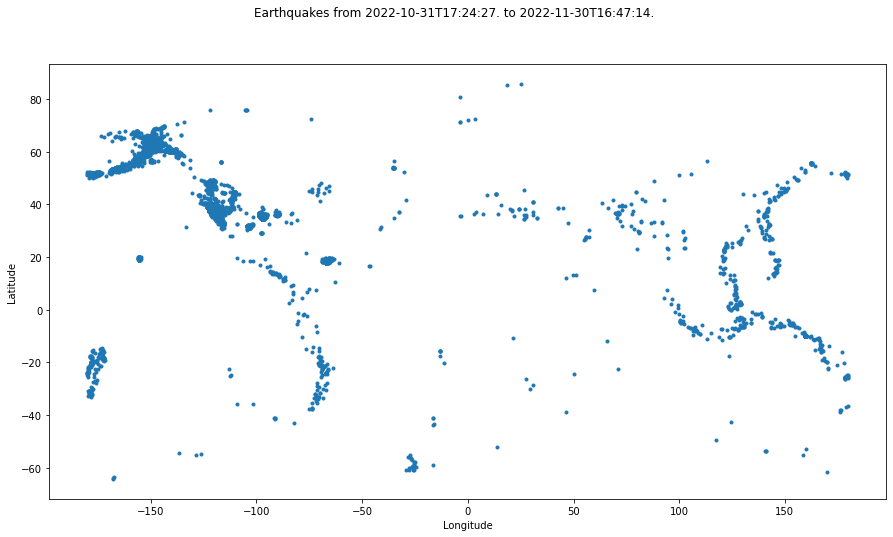

In [9]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

# latitude and longitude of earthquake site of top 10500 samples.
plt.plot(np.round(df['longitude'].head(10500),rounding_factor), 
         np.round(df['latitude'].head(10500),rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Extracting Date from time column.**

In [10]:
df = df.sort_values('time', ascending=True)

#Date extraction
df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
10158,2022-10-31T17:24:27.320Z,34.333000,-116.840167,-1.41,1.16,ml,11.0,88.0,0.0183,0.12,...,"8km N of Big Bear City, CA",quarry blast,0.43,31.61,0.09,25.0,reviewed,ci,ci,2022-10-31
10157,2022-10-31T17:25:47.194Z,61.112300,-141.225800,10.80,1.10,ml,NaN,NaN,NaN,0.34,...,"97 km ESE of McCarthy, Alaska",earthquake,NaN,0.90,NaN,NaN,reviewed,ak,ak,2022-10-31
10156,2022-10-31T17:27:36.010Z,19.240667,-155.408173,29.49,2.32,ml,13.0,135.0,NaN,0.12,...,"Island of Hawaii, Hawaii",earthquake,0.97,1.23,5.40,3.0,automatic,hv,hv,2022-10-31
10155,2022-10-31T17:31:39.790Z,19.458500,-155.597000,-1.38,1.94,ml,13.0,75.0,NaN,0.19,...,"28 km E of Honaunau-Napoopoo, Hawaii",earthquake,0.39,0.30,4.16,5.0,automatic,hv,hv,2022-10-31
10154,2022-10-31T17:34:29.645Z,61.139900,-151.779100,78.90,1.70,ml,NaN,NaN,NaN,0.39,...,"35 km WNW of Tyonek, Alaska",earthquake,NaN,0.40,NaN,NaN,reviewed,ak,ak,2022-10-31


**Data cleaning for seperating 'place' column.Hence only consider city by seperating string by ','.**

In [11]:
# only keep the columns needed
df = df[['date','time' ,'latitude', 'longitude', 'depth', 'mag', 'place']]
# df['date'] = df['time'].str.split(', ', expand=True) 
newdf = df['place'].str.split(', ', expand=True) 

In [12]:
newdf.head()

,0,1,2
10158,8km N of Big Bear City,CA,None
10157,97 km ESE of McCarthy,Alaska,None
10156,Island of Hawaii,Hawaii,None
10155,28 km E of Honaunau-Napoopoo,Hawaii,None
10154,35 km WNW of Tyonek,Alaska,None


In [13]:
df['place'] = newdf[1]
df = df[['date','latitude', 'longitude', 'depth', 'mag', 'place']]

In [14]:
df.head()

,date,latitude,longitude,depth,mag,place
10158,2022-10-31,34.333000,-116.840167,-1.41,1.16,CA
10157,2022-10-31,61.112300,-141.225800,10.80,1.10,Alaska
10156,2022-10-31,19.240667,-155.408173,29.49,2.32,Hawaii
10155,2022-10-31,19.458500,-155.597000,-1.38,1.94,Hawaii
10154,2022-10-31,61.139900,-151.779100,78.90,1.70,Alaska


In [15]:
print('total locations:',len(set(df['place'])))

total locations: 105


**Bar plot of mean magnitude vs place, as we can see from the graph, only few countries are considered as epicenter of dangerous since they have magnitude more than 2.8**

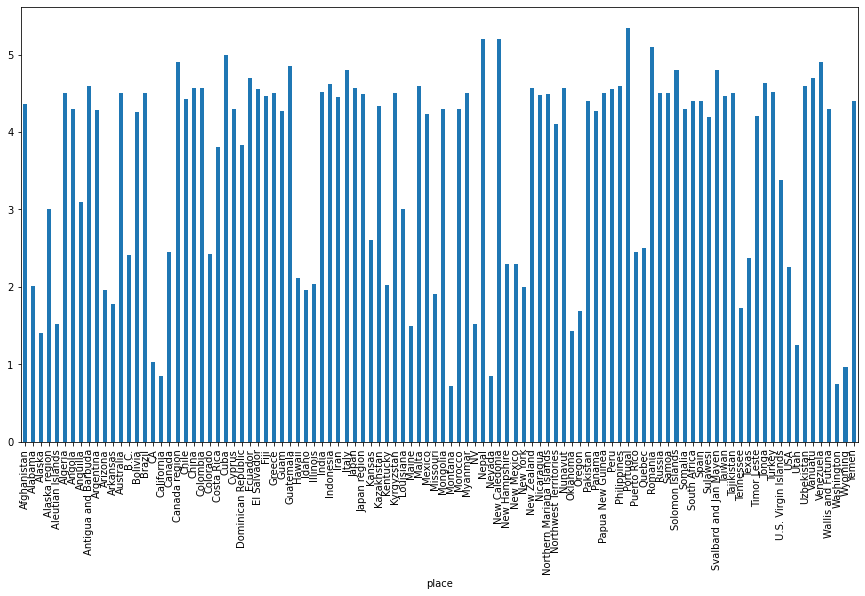

In [16]:
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8));

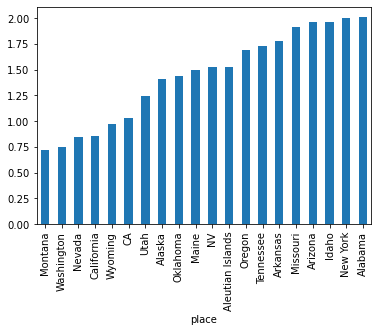

In [17]:
df.groupby(['place'])['mag'].mean().nsmallest(20).plot(kind='bar');

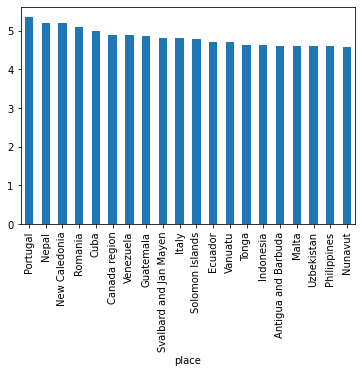

In [18]:
df.groupby(['place'])['mag'].mean().nlargest(20).plot(kind='bar');

**Lets consider 3 as threshold for how high the earthquake has hit and lets visualize countries with more than 3 magnitude.**

In [19]:
more_dangerous_places=df.groupby('place')['mag'].mean()
more_dangerous_places=more_dangerous_places[more_dangerous_places>3]

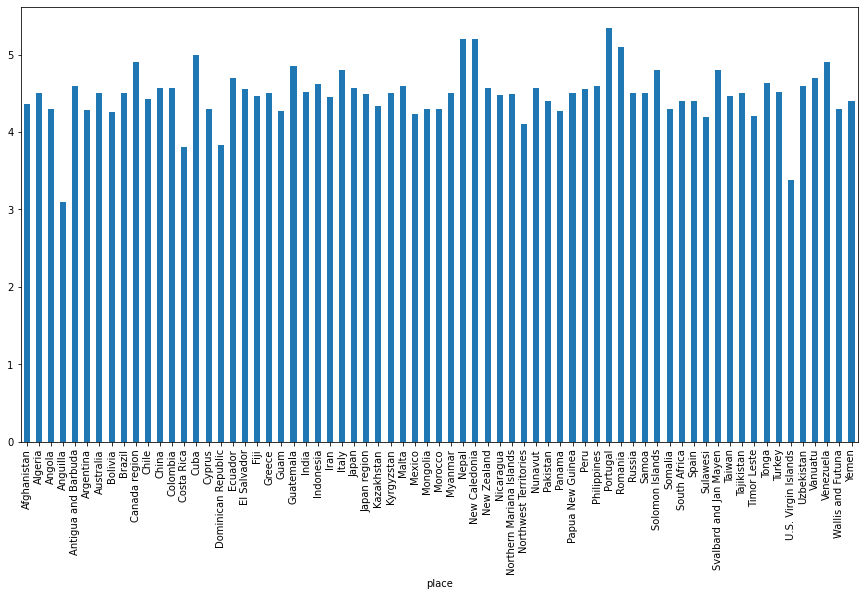

In [20]:
more_dangerous_places.plot(kind='bar',figsize= (15,8));

In [21]:
# calculate mean latitude and longitude for simplified locations

df_coords = df[['place','latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place','latitude', 'longitude']]

In [22]:
df_coords.head()

,place,latitude,longitude
0,Afghanistan,36.466317,70.820667
1,Alabama,33.201333,-86.110000
2,Alaska,59.194554,-155.376073
3,Alaska region,56.574000,-169.537500
4,Aleutian Islands,51.944034,-137.438036


**Merge the two dataframes of mean latitude and longitude locations calculated above with dataframe only considering ['date','depth','mag','place'] as columns out of total features**

In [23]:
df = df[['date','depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df.head()

print('total locations:',len(set(df['place'])))


total locations: 104


In [24]:
print(set(df['place']))

{'Tennessee', 'Kyrgyzstan', 'Myanmar', 'Alaska region', 'Wallis and Futuna', 'Montana', 'New York', 'Missouri', 'Idaho', 'Kazakhstan', 'Alaska', 'Tajikistan', 'Cuba', 'New Mexico', 'Portugal', 'Washington', 'Utah', 'Solomon Islands', 'Cyprus', 'El Salvador', 'Northern Mariana Islands', 'Taiwan', 'NV', 'Oklahoma', 'Canada', 'Nevada', 'Romania', 'Arkansas', 'New Caledonia', 'Bolivia', 'Angola', 'Uzbekistan', 'Anguilla', 'Spain', 'Indonesia', 'Yemen', 'Illinois', 'Japan', 'Kansas', 'Peru', 'Vanuatu', 'Malta', 'Algeria', 'China', 'Maine', 'Mongolia', 'Canada region', 'Mexico', 'Dominican Republic', 'Samoa', 'Alabama', 'Louisiana', 'Pakistan', 'South Africa', 'Philippines', 'Tonga', 'Wyoming', 'USA', 'Russia', 'Greece', 'India', 'Iran', 'Timor Leste', 'Quebec', 'Costa Rica', 'Oregon', 'Aleutian Islands', 'Turkey', 'Colorado', 'Venezuela', 'Texas', 'Nunavut', 'Brazil', 'Nicaragua', 'Italy', 'New Hampshire', 'Northwest Territories', 'Arizona', 'Colombia', 'U.S. Virgin Islands', 'Japan region'

In [25]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2022-10-31,-1.41,1.16,CA,36.644073,-120.132241
1,2022-10-31,7.96,1.57,CA,36.644073,-120.132241
2,2022-10-31,0.93,0.35,CA,36.644073,-120.132241
3,2022-10-31,4.90,1.32,CA,36.644073,-120.132241
4,2022-10-31,5.07,1.81,CA,36.644073,-120.132241


## Feature Engineering 

<ul>
    <li>Set rolling window size for future prediction based on past values with fixed window size in past.</li>
    <li>A final outcome 'mag_outcome' has been defined as target values and the output is considered as shifted values from set rolling window of past days e.g:'7'</li>
</ul>

In [26]:
eq_tmp = df.copy()

#rolling window size
DAYS_OUT_TO_PREDICT = 7

# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    #avg. depth of 22 days rolling period and so on..
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean() 
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean() 
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

In [27]:
# concat all location-based dataframes into master dataframe
eq_all = pd.concat(eq_data)

In [28]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
8921,2022-11-01,6.48,1.42,Tennessee,36.283402,-89.134402,NaN,NaN,NaN,NaN,NaN,NaN,1.768571
8922,2022-11-01,7.04,0.91,Tennessee,36.283402,-89.134402,NaN,NaN,NaN,NaN,NaN,NaN,1.888571
8923,2022-11-03,7.01,1.12,Tennessee,36.283402,-89.134402,NaN,NaN,NaN,NaN,NaN,NaN,1.975714
8924,2022-11-06,8.85,1.72,Tennessee,36.283402,-89.134402,NaN,NaN,NaN,NaN,NaN,NaN,1.978571
8925,2022-11-09,6.96,1.46,Tennessee,36.283402,-89.134402,NaN,NaN,NaN,NaN,NaN,NaN,1.937143


In [29]:
# remove any NaN fields
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [30]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
9072,2022-11-14,2.330,-0.04,Montana,44.863002,-111.066538,8.136045,7.856000,7.352857,0.683636,0.550667,0.505714,0.992857
9073,2022-11-14,1.490,0.38,Montana,44.863002,-111.066538,8.029227,7.395333,7.257143,0.639091,0.574667,0.570000,0.997143
9074,2022-11-14,1.790,0.36,Montana,44.863002,-111.066538,7.628182,7.010667,5.820000,0.523636,0.592667,0.470000,1.007143
9075,2022-11-16,15.830,0.58,Montana,44.863002,-111.066538,7.608182,7.502667,6.774286,0.547727,0.595333,0.522857,0.957143
9076,2022-11-16,11.888,3.70,Montana,44.863002,-111.066538,7.921273,7.773200,8.495429,0.656818,0.827333,1.004286,0.430000


**Location after feature engineering**

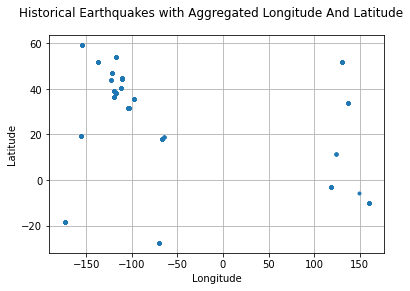

In [31]:
plt.plot(eq_all['longitude'], 
         eq_all['latitude'],
         linestyle='none', marker='.')
plt.suptitle('Historical Earthquakes with Aggregated Longitude And Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [32]:
# keep our live data for predictions
eq_data_last_days_out = pd.concat(eq_data_last_days_out)


eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [33]:
# here 'mag_outcome' has NaN because these are future outcome event to be predicted live or data that has not yet been witnessed
predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
9083,2022-11-21,2.040,0.01,Montana,44.863002,-111.066538,7.420818,7.064533,6.665714,0.700909,0.691333,0.430000,NaN
9084,2022-11-22,1.710,0.50,Montana,44.863002,-111.066538,7.124000,7.189200,6.535714,0.711364,0.702667,0.388571,NaN
9085,2022-11-24,8.210,0.01,Montana,44.863002,-111.066538,6.976273,6.922533,5.767143,0.630000,0.640000,0.292857,NaN
9086,2022-11-25,15.941,2.60,Montana,44.863002,-111.066538,7.420409,7.056600,6.617286,0.674545,0.740000,0.598571,NaN
9087,2022-11-26,4.760,0.82,Montana,44.863002,-111.066538,7.261318,7.218600,6.174429,0.704545,0.797333,0.657143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7872,2022-11-21,10.000,4.80,Papua New Guinea,-5.524528,149.714707,74.587773,83.180533,36.020857,4.504545,4.520000,4.800000,NaN
7873,2022-11-21,108.700,4.60,Papua New Guinea,-5.524528,149.714707,75.801909,85.706733,50.120857,4.509091,4.553333,4.757143,NaN
7874,2022-11-24,107.123,4.90,Papua New Guinea,-5.524528,149.714707,80.216591,92.181600,63.995571,4.531818,4.593333,4.771429,NaN
7875,2022-11-24,10.000,4.00,Papua New Guinea,-5.524528,149.714707,77.947136,90.514933,58.221143,4.490909,4.566667,4.642857,NaN


**Considered magnitude above 2.5 as dangerous hence prediction outcome as '1'else '0'**

In [34]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    8149.000000
mean        0.047736
std         0.213220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mag_outcome, dtype: float64


0    7760
1     389
Name: mag_outcome, dtype: int64

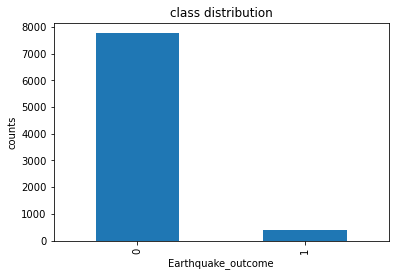

In [35]:
eq_all['mag_outcome'].value_counts().plot(kind='bar',)
plt.xlabel('Earthquake_outcome')
plt.ylabel('counts')
plt.title('class distribution');

**Save the data of fixed rolling window and live unknown prediction data in sql database using sql engine**

In [36]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Earthquakedata.db')
eq_all.to_sql('Earthquake_features', engine, index=False,if_exists='replace')

In [37]:
engine = create_engine('sqlite:///Earthquakedata_predict.db')
predict_unknown.to_sql('Earthquake_predict', engine, index=False,if_exists='replace')